# Import libraries

In [13]:
import numpy as np
import pandas as pd 
import seaborn as sns
import os 
for dirname , __, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print (os.path.join(dirname ,filename))

Libraries we may need in the future 

In [14]:
#import matplotlib.pyolt as plt 
#from matplotlib.pyplot import figure as fig
#import seaborn as sns
#from scipy.stats import linregress

Read data

In [15]:
DataSet = pd.read_excel('jobs1.xlsx')

# Show the data before cleaning 

In [16]:
DataSet

,Job ID,Title,Job URL,Company,Company_URL,Date Posted,Job Description,Job Location,Company Industry,Company Type,...,Tags,Gender,Job Country,Job City,Min Years of Experience,Max Years of Experience,Min Age,Max Age,Monthly Salary Min Range,Monthly Salary Max Range
0,3682530,Medical Technologist II,https://www.bayt.com/en/saudi-arabia/jobs/role...,King Fahad Medical City,https://www.bayt.com/en/company/king-fahad-med...,2019-04-22,1. Collecting specimens from Specimen Proces...,"Riyadh, Saudi Arabia",Other Healthcare Services,Employer (Private Sector),...,[],Male,Saudi Arabia,Riyadh,3.0,NaN,NaN,NaN,NaN,NaN
1,50907907,General Storekeeper,https://www.bayt.com/en/saudi-arabia/jobs/role...,"Marriott International, Inc & Ritz Carlton Hot...",https://www.bayt.com/en/company/marriott-inter...,2019-04-24,"Posting Date Feb 26, 2020Job Number 1900178O...","Riyadh, Saudi Arabia",Other Business Support Services,Unspecified,...,[],NaN,Saudi Arabia,Riyadh,NaN,NaN,NaN,NaN,NaN,NaN
2,50907907,General Storekeeper,https://www.bayt.com/en/saudi-arabia/jobs/role...,"Marriott International, Inc & Ritz Carlton Hot...",https://www.bayt.com/en/company/marriott-inter...,2019-04-24,"Posting Date Feb 26, 2020Job Number 1900178O...","Riyadh, Saudi Arabia",Other Business Support Services,Unspecified,...,[],NaN,Saudi Arabia,Riyadh,NaN,NaN,NaN,NaN,NaN,NaN
3,50898705,Project Coordinator,https://www.bayt.com/en/saudi-arabia/jobs/role...,CC Staffing International,https://www.bayt.com/en/international/jobs/q/c...,2019-04-25,and Role: â€¢ Knowledge of architectural pl...,Saudi Arabia,Construction & Building,Unspecified,...,[],NaN,Saudi Arabia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50907786,Receiving Clerk,https://www.bayt.com/en/saudi-arabia/jobs/role...,"Marriott International, Inc & Ritz Carlton Hot...",https://www.bayt.com/en/company/marriott-inter...,2019-04-25,"Posting Date Nov 14, 2019Job Number 190017KT...","Riyadh, Saudi Arabia",Other Business Support Services,Unspecified,...,[],NaN,Saudi Arabia,Riyadh,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,55104893,"Sales Engineer ""Civil""",https://www.bayt.com/en/saudi-arabia/jobs/role...,Merge,https://www.bayt.com/en/company/merge-0-2114860/,2020-04-18,: Market and sell products and services to ...,"Riyadh, Saudi Arabia",Other Business Support Services,Unspecified,...,[],NaN,Saudi Arabia,Riyadh,NaN,NaN,NaN,NaN,NaN,NaN
3464,55111196,Process Engineer - Unconventional Resources,https://www.bayt.com/en/saudi-arabia/jobs/role...,Saudi Aramco Shell Refining - SASREF,https://www.bayt.com/en/company/saudi-aramco-s...,2020-04-18,,Saudi Arabia,Other Business Support Services,Unspecified,...,[],NaN,Saudi Arabia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3465,55103232,Technical Clerk (Local Hire),https://www.bayt.com/en/saudi-arabia/jobs/role...,SNC Lavalin,https://www.bayt.com/en/international/jobs/q/s...,2020-04-18,"Technical Clerks shall read, write and speak...","Khobar, Saudi Arabia",Other Business Support Services,Unspecified,...,[],NaN,Saudi Arabia,Khobar,NaN,NaN,NaN,NaN,NaN,NaN
3466,55105132,Sales Executive,https://www.bayt.com/en/saudi-arabia/jobs/role...,Merge,https://www.bayt.com/en/company/merge-0-2114860/,2020-04-18,,Saudi Arabia,Other Business Support Services,Unspecified,...,[],NaN,Saudi Arabia,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Displays the Columns, Types, Rows and the memory used by the dataframe
we can see there are no null values
and columns with numerical values are type int64, no need to set data type


In [17]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Job ID                    3468 non-null   int64         
 1   Title                     3464 non-null   object        
 2   Job URL                   3468 non-null   object        
 3   Company                   3468 non-null   object        
 4   Company_URL               3468 non-null   object        
 5   Date Posted               3468 non-null   datetime64[ns]
 6   Job Description           3468 non-null   object        
 7   Job Location              3467 non-null   object        
 8   Company Industry          3468 non-null   object        
 9   Company Type              3468 non-null   object        
 10  Job Role                  3468 non-null   object        
 11  Employment Type           3468 non-null   object        
 12  Number of Vacancies 

In [18]:
# to view the first 5 observation
DataSet.head()

,Job ID,Title,Job URL,Company,Company_URL,Date Posted,Job Description,Job Location,Company Industry,Company Type,...,Tags,Gender,Job Country,Job City,Min Years of Experience,Max Years of Experience,Min Age,Max Age,Monthly Salary Min Range,Monthly Salary Max Range
0,3682530,Medical Technologist II,https://www.bayt.com/en/saudi-arabia/jobs/role...,King Fahad Medical City,https://www.bayt.com/en/company/king-fahad-med...,2019-04-22,1. Collecting specimens from Specimen Proces...,"Riyadh, Saudi Arabia",Other Healthcare Services,Employer (Private Sector),...,[],Male,Saudi Arabia,Riyadh,3.0,NaN,NaN,NaN,NaN,NaN
1,50907907,General Storekeeper,https://www.bayt.com/en/saudi-arabia/jobs/role...,"Marriott International, Inc & Ritz Carlton Hot...",https://www.bayt.com/en/company/marriott-inter...,2019-04-24,"Posting Date Feb 26, 2020Job Number 1900178O...","Riyadh, Saudi Arabia",Other Business Support Services,Unspecified,...,[],NaN,Saudi Arabia,Riyadh,NaN,NaN,NaN,NaN,NaN,NaN
2,50907907,General Storekeeper,https://www.bayt.com/en/saudi-arabia/jobs/role...,"Marriott International, Inc & Ritz Carlton Hot...",https://www.bayt.com/en/company/marriott-inter...,2019-04-24,"Posting Date Feb 26, 2020Job Number 1900178O...","Riyadh, Saudi Arabia",Other Business Support Services,Unspecified,...,[],NaN,Saudi Arabia,Riyadh,NaN,NaN,NaN,NaN,NaN,NaN
3,50898705,Project Coordinator,https://www.bayt.com/en/saudi-arabia/jobs/role...,CC Staffing International,https://www.bayt.com/en/international/jobs/q/c...,2019-04-25,and Role: â€¢ Knowledge of architectural pl...,Saudi Arabia,Construction & Building,Unspecified,...,[],NaN,Saudi Arabia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50907786,Receiving Clerk,https://www.bayt.com/en/saudi-arabia/jobs/role...,"Marriott International, Inc & Ritz Carlton Hot...",https://www.bayt.com/en/company/marriott-inter...,2019-04-25,"Posting Date Nov 14, 2019Job Number 190017KT...","Riyadh, Saudi Arabia",Other Business Support Services,Unspecified,...,[],NaN,Saudi Arabia,Riyadh,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Displays the last few rows in the dataframe
DataSet.tail()

,Job ID,Title,Job URL,Company,Company_URL,Date Posted,Job Description,Job Location,Company Industry,Company Type,...,Tags,Gender,Job Country,Job City,Min Years of Experience,Max Years of Experience,Min Age,Max Age,Monthly Salary Min Range,Monthly Salary Max Range
3463,55104893,"Sales Engineer ""Civil""",https://www.bayt.com/en/saudi-arabia/jobs/role...,Merge,https://www.bayt.com/en/company/merge-0-2114860/,2020-04-18,: Market and sell products and services to ...,"Riyadh, Saudi Arabia",Other Business Support Services,Unspecified,...,[],NaN,Saudi Arabia,Riyadh,NaN,NaN,NaN,NaN,NaN,NaN
3464,55111196,Process Engineer - Unconventional Resources,https://www.bayt.com/en/saudi-arabia/jobs/role...,Saudi Aramco Shell Refining - SASREF,https://www.bayt.com/en/company/saudi-aramco-s...,2020-04-18,,Saudi Arabia,Other Business Support Services,Unspecified,...,[],NaN,Saudi Arabia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3465,55103232,Technical Clerk (Local Hire),https://www.bayt.com/en/saudi-arabia/jobs/role...,SNC Lavalin,https://www.bayt.com/en/international/jobs/q/s...,2020-04-18,"Technical Clerks shall read, write and speak...","Khobar, Saudi Arabia",Other Business Support Services,Unspecified,...,[],NaN,Saudi Arabia,Khobar,NaN,NaN,NaN,NaN,NaN,NaN
3466,55105132,Sales Executive,https://www.bayt.com/en/saudi-arabia/jobs/role...,Merge,https://www.bayt.com/en/company/merge-0-2114860/,2020-04-18,,Saudi Arabia,Other Business Support Services,Unspecified,...,[],NaN,Saudi Arabia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3467,55111190,O&M Generalist,https://www.bayt.com/en/saudi-arabia/jobs/role...,johnsoncontrols,https://www.bayt.com/en/international/jobs/q/j...,2020-04-18,- QualificationsJobPrimary LocationOther Loc...,Saudi Arabia,Other Business Support Services,Unspecified,...,[],NaN,Saudi Arabia,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# head and tail are good.  But sometimes we want to randomly sample data 
DataSet.sample(10)

,Job ID,Title,Job URL,Company,Company_URL,Date Posted,Job Description,Job Location,Company Industry,Company Type,...,Tags,Gender,Job Country,Job City,Min Years of Experience,Max Years of Experience,Min Age,Max Age,Monthly Salary Min Range,Monthly Salary Max Range
1215,53877607,Project Engineer,https://www.bayt.com/en/saudi-arabia/jobs/role...,johnsoncontrols,https://www.bayt.com/en/international/jobs/q/j...,2020-02-11,- QualificationsJobPrimary LocationOther Loc...,"Jeddah, Saudi Arabia",Other Business Support Services,Unspecified,...,[],NaN,Saudi Arabia,Jeddah,NaN,NaN,NaN,NaN,NaN,NaN
663,50536599,Senior Consultant Medical Oncology,https://www.bayt.com/en/saudi-arabia/jobs/role...,King Faisal Specialist Hospital - Jeddah,https://www.bayt.com/en/international/jobs/q/k...,2020-01-07,Senior Consultant Medical Oncology King Fa...,"Jeddah, Saudi Arabia",Medical Hospital,Unspecified,...,[],NaN,Saudi Arabia,Jeddah,NaN,NaN,NaN,NaN,NaN,NaN
564,53614066,Guest Services Associate ( Saudi National Only ),https://www.bayt.com/en/saudi-arabia/jobs/role...,"Marriott International, Inc & Ritz Carlton Hot...",https://www.bayt.com/en/company/marriott-inter...,2020-01-02,"Posting Date Jan 01, 2020Job Number 20000010...","Riyadh, Saudi Arabia",Other Business Support Services,Unspecified,...,[],NaN,Saudi Arabia,Riyadh,NaN,NaN,NaN,NaN,NaN,NaN
1756,4157672,Ù…Ø´Ø±Ù Ù…Ø¨ÙŠØ¹Ø§Øª,https://www.bayt.com/en/saudi-arabia/jobs/role...,Surrati Perfumes Company Limited,https://www.bayt.com/en/company/surrati-perfum...,2020-03-02,Â· Ù…Ø±Ø§Ù‚Ø¨Ø© Ù†Ø´Ø§Ø· Ø§Ù„Ù…Ø¨ÙŠØ¹Ø§Øª Ø§...,"Eastern Province, Saudi Arabia",Perfume & Cosmetics,Employer (Private Sector),...,"['Sales Supervision', 'Sales', 'Fragrances']",Male,Saudi Arabia,Eastern Province,3.0,NaN,NaN,NaN,NaN,NaN
2653,54881048,Development Geophysicist,https://www.bayt.com/en/saudi-arabia/jobs/role...,Aramco Services Company,https://www.bayt.com/en/company/aramco-service...,2020-03-28,Req Number: 18167BRPosition Description: As ...,Saudi Arabia,Oil & Gas,Unspecified,...,[],NaN,Saudi Arabia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1304,54122678,BMC Remedy Administrator,https://www.bayt.com/en/saudi-arabia/jobs/role...,CC Staffing International,https://www.bayt.com/en/international/jobs/q/c...,2020-02-19,and Role: â€¢ Manage BMC Remedy Administrat...,Saudi Arabia,IT Services,Unspecified,...,[],NaN,Saudi Arabia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1612,54289270,Asst Inspector II,https://www.bayt.com/en/saudi-arabia/jobs/role...,Almansoori,https://www.bayt.com/en/international/jobs/q/a...,2020-02-27,DRIVER / HELPER ( Asst Inspector II)Minimum ...,Saudi Arabia,Oil & Gas,Unspecified,...,[],NaN,Saudi Arabia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,52972154,Consultant - Pediatric Cardiology (Non Invasive),https://www.bayt.com/en/saudi-arabia/jobs/role...,King Faisal Specialist Hospital - Madinah,https://www.bayt.com/en/international/jobs/q/k...,2019-11-07,Consultant - Pediatric Cardiology (Non Inva...,"Medina, Saudi Arabia",Medical Hospital,Unspecified,...,[],NaN,Saudi Arabia,Medina,NaN,NaN,NaN,NaN,NaN,NaN
2827,4174329,Sales Advisor,https://www.bayt.com/en/saudi-arabia/jobs/role...,The Gulf Recruitment Group,https://www.bayt.com/en/company/the-gulf-recru...,2020-03-30,Saudi national talent for instore sales (In ...,"Jeddah, Saudi Arabia",Tobacco & Smoking Goods,Recruitment Agency,...,['Sales'],Male,Saudi Arabia,Jeddah,NaN,NaN,20.0,40.0,2000.0,3000.0
631,50536039,Consultant Medical Imaging,https://www.bayt.com/en/saudi-arabia/jobs/role...,Prince Imam Abdulrahman Al Faisal Hospital - D...,https://www.bayt.com/en/international/jobs/q/p...,2020-01-07,Consultant Medical Imaging Prince Imam Abd...,"Dammam, Saudi Arabia",Medical Hospital,Unspecified,...,[],NaN,Saudi Arabia,Dammam,NaN,NaN,NaN,NaN,NaN,NaN


# To view all columns of the dataframe :

In [22]:
DataSet.columns

Index(['Job ID', 'Title', 'Job URL', 'Company', 'Company_URL', 'Date Posted',
       'Job Description', 'Job Location', 'Company Industry', 'Company Type',
       'Job Role', 'Employment Type', 'Number of Vacancies', 'Career Level',
       'Residence Location', 'Degree', 'Tags', 'Gender', 'Job Country',
       'Job City', 'Min Years of Experience', 'Max Years of Experience',
       'Min Age', 'Max Age', 'Monthly Salary Min Range',
       'Monthly Salary Max Range'],
      dtype='object')

# Rename Columns because not valid in python 

In [23]:
DataSet.rename(columns={'Job ID' : 'Job_ID', 'Title' : 'Job_Title', 'Job URL' : 'Job_URL', 'Date Posted': 'Date_Posted',
       'Job Description' : 'Job_Description', 'Job Location' : 'Job_Location', 'Company Industry': 'Company_Industry', 'Company Type': 'Company_Type',
       'Job Role' : 'Job_Role', 'Employment Type':'Employment_Type' , 'Number of Vacancies' : 'Num_of_Vacancies', 'Career Level': 'Career_Level',
       'Residence Location': 'Residence_Location',  'Job Country' : 'Job_Country',
       'Job City': 'Job_City', 'Min Years of Experience': 'Min_Years_of_Experience', 'Max Years of Experience': 'Max_Years_of_Experience',
       'Min Age' : 'Min_Age', 'Max Age': 'Max_Age', 'Monthly Salary Min Range': 'Monthly_Salary_Min_Range',
       'Monthly Salary Max Range' : 'Monthly_Salary_Max_Range'}, inplace = True )

In [24]:
#Rename successfully 
DataSet.columns

Index(['Job_ID', 'Job_Title', 'Job_URL', 'Company', 'Company_URL',
       'Date_Posted', 'Job_Description', 'Job_Location', 'Company_Industry',
       'Company_Type', 'Job_Role', 'Employment_Type', 'Num_of_Vacancies',
       'Career_Level', 'Residence_Location', 'Degree', 'Tags', 'Gender',
       'Job_Country', 'Job_City', 'Min_Years_of_Experience',
       'Max_Years_of_Experience', 'Min_Age', 'Max_Age',
       'Monthly_Salary_Min_Range', 'Monthly_Salary_Max_Range'],
      dtype='object')

# Detecting Missing Values

In [25]:
DataSet.isna()

,Job_ID,Job_Title,Job_URL,Company,Company_URL,Date_Posted,Job_Description,Job_Location,Company_Industry,Company_Type,...,Tags,Gender,Job_Country,Job_City,Min_Years_of_Experience,Max_Years_of_Experience,Min_Age,Max_Age,Monthly_Salary_Min_Range,Monthly_Salary_Max_Range
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,True,True,True,True,True
3464,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,True,True,True,True,True,True
3465,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,True,True,True,True,True
3466,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,True,True,True,True,True,True


In [26]:
#Dropped Column
DataSet.drop('Min_Age' , axis = 1 , inplace = True)
DataSet.drop('Max_Age' , axis = 1 , inplace = True )
DataSet.drop('Monthly_Salary_Min_Range' , axis = 1 , inplace = True)
DataSet.drop('Monthly_Salary_Max_Range' , axis = 1 , inplace = True)
DataSet.drop('Job_Country' , axis =1 , inplace = True)
DataSet.drop('Tags' , axis =1 , inplace = True)
DataSet.drop('Residence_Location' , axis =1 , inplace = True)
DataSet.drop('Num_of_Vacancies' , axis =1 , inplace = True)

In [27]:
#To count number of rows and columns after deopped 
DataSet.shape

(3468, 18)

In [32]:
DataSet.Job_Role.unique()

array(['Medical, Healthcare, and Nursing', 'Engineering', 'Management',
       'Sales', 'Maintenance, Repair, and Technician', 'Marketing and PR',
       'Human Resources and Recruitment', 'Hospitality and Tourism',
       'Teaching and Academics', 'Administration',
       'Information Technology', 'Quality Control'], dtype=object)

Visulaize the outlier

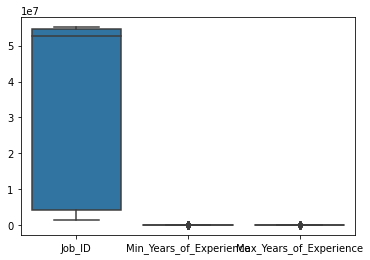

In [33]:
sns.boxplot(data=DataSet);

# Handlling with missing values 

In [34]:
DataSet.Gender.fillna('M/F', inplace= True) 

DataSet.Degree.fillna('Bachelors degree / higher diploma' , inplace = True)

In [35]:
DataSet.median()

<ipython-input-35-dc53e02130df>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  DataSet.median()


Job_ID                     52792904.5
Min_Years_of_Experience           3.0
Max_Years_of_Experience           7.0
dtype: float64

In [36]:
DataSet.groupby('Degree').median()

,Job_ID,Min_Years_of_Experience,Max_Years_of_Experience
Degree,,,
12,55086855.0,NaN,NaN
13,55086854.0,NaN,NaN
Bachelor's degree / higher diploma,4165815.5,5.0,7.0
Bachelors degree / higher diploma,53778854.0,3.0,8.0
Certification / diploma,4157772.0,2.0,6.0
Doctorate,3772123.0,3.0,20.0
High school or equivalent,4173122.0,1.0,3.0
Master's degree,4167649.0,5.0,15.0


In [37]:
DataSet.Min_Years_of_Experience.fillna(3.0 , inplace = True)
DataSet.Max_Years_of_Experience.fillna(7 , inplace = True)

In [38]:
# To measure based the year 
DataSet['Year']= pd.DatetimeIndex(DataSet['Date_Posted']).year

In [39]:
#Drop column dates after extract the year 
DataSet.drop('Date_Posted' , axis =1 , inplace = True)

In [40]:
DataSet

,Job_ID,Job_Title,Job_URL,Company,Company_URL,Job_Description,Job_Location,Company_Industry,Company_Type,Job_Role,Employment_Type,Career_Level,Degree,Gender,Job_City,Min_Years_of_Experience,Max_Years_of_Experience,Year
0,3682530,Medical Technologist II,https://www.bayt.com/en/saudi-arabia/jobs/role...,King Fahad Medical City,https://www.bayt.com/en/company/king-fahad-med...,1. Collecting specimens from Specimen Proces...,"Riyadh, Saudi Arabia",Other Healthcare Services,Employer (Private Sector),"Medical, Healthcare, and Nursing",Unspecified,Management,Bachelor's degree / higher diploma,Male,Riyadh,3.0,7.0,2019
1,50907907,General Storekeeper,https://www.bayt.com/en/saudi-arabia/jobs/role...,"Marriott International, Inc & Ritz Carlton Hot...",https://www.bayt.com/en/company/marriott-inter...,"Posting Date Feb 26, 2020Job Number 1900178O...","Riyadh, Saudi Arabia",Other Business Support Services,Unspecified,Engineering,Unspecified,NaN,Bachelors degree / higher diploma,M/F,Riyadh,3.0,7.0,2019
2,50907907,General Storekeeper,https://www.bayt.com/en/saudi-arabia/jobs/role...,"Marriott International, Inc & Ritz Carlton Hot...",https://www.bayt.com/en/company/marriott-inter...,"Posting Date Feb 26, 2020Job Number 1900178O...","Riyadh, Saudi Arabia",Other Business Support Services,Unspecified,Engineering,Unspecified,NaN,Bachelors degree / higher diploma,M/F,Riyadh,3.0,7.0,2019
3,50898705,Project Coordinator,https://www.bayt.com/en/saudi-arabia/jobs/role...,CC Staffing International,https://www.bayt.com/en/international/jobs/q/c...,and Role: â€¢ Knowledge of architectural pl...,Saudi Arabia,Construction & Building,Unspecified,Management,Unspecified,NaN,Bachelors degree / higher diploma,M/F,NaN,3.0,7.0,2019
4,50907786,Receiving Clerk,https://www.bayt.com/en/saudi-arabia/jobs/role...,"Marriott International, Inc & Ritz Carlton Hot...",https://www.bayt.com/en/company/marriott-inter...,"Posting Date Nov 14, 2019Job Number 190017KT...","Riyadh, Saudi Arabia",Other Business Support Services,Unspecified,Sales,Unspecified,NaN,Bachelors degree / higher diploma,M/F,Riyadh,3.0,7.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,55104893,"Sales Engineer ""Civil""",https://www.bayt.com/en/saudi-arabia/jobs/role...,Merge,https://www.bayt.com/en/company/merge-0-2114860/,: Market and sell products and services to ...,"Riyadh, Saudi Arabia",Other Business Support Services,Unspecified,Marketing and PR,Unspecified,NaN,Bachelors degree / higher diploma,M/F,Riyadh,3.0,7.0,2020
3464,55111196,Process Engineer - Unconventional Resources,https://www.bayt.com/en/saudi-arabia/jobs/role...,Saudi Aramco Shell Refining - SASREF,https://www.bayt.com/en/company/saudi-aramco-s...,,Saudi Arabia,Other Business Support Services,Unspecified,Marketing and PR,Unspecified,NaN,Bachelors degree / higher diploma,M/F,NaN,3.0,7.0,2020
3465,55103232,Technical Clerk (Local Hire),https://www.bayt.com/en/saudi-arabia/jobs/role...,SNC Lavalin,https://www.bayt.com/en/international/jobs/q/s...,"Technical Clerks shall read, write and speak...","Khobar, Saudi Arabia",Other Business Support Services,Unspecified,Sales,Unspecified,NaN,Bachelors degree / higher diploma,M/F,Khobar,3.0,7.0,2020
3466,55105132,Sales Executive,https://www.bayt.com/en/saudi-arabia/jobs/role...,Merge,https://www.bayt.com/en/company/merge-0-2114860/,,Saudi Arabia,Other Business Support Services,Unspecified,Sales,Unspecified,NaN,Bachelors degree / higher diploma,M/F,NaN,3.0,7.0,2020


In [62]:
DataSet.shape

(3468, 18)

To count number of pstosing jobs based on career level

In [63]:
df_mcount=DataSet.groupby(["Career_Level"]).agg(
    JobNeeds=pd.NamedAgg(column="Career_Level", aggfunc="count")
)
df_mcount

,JobNeeds
Career_Level,
Director/Head,39
Entry Level,143
Fresh Graduate,10
Management,207
Mid Career,565
Senior Executive,8
Student/Internship,14


# Visualize the data to provide information

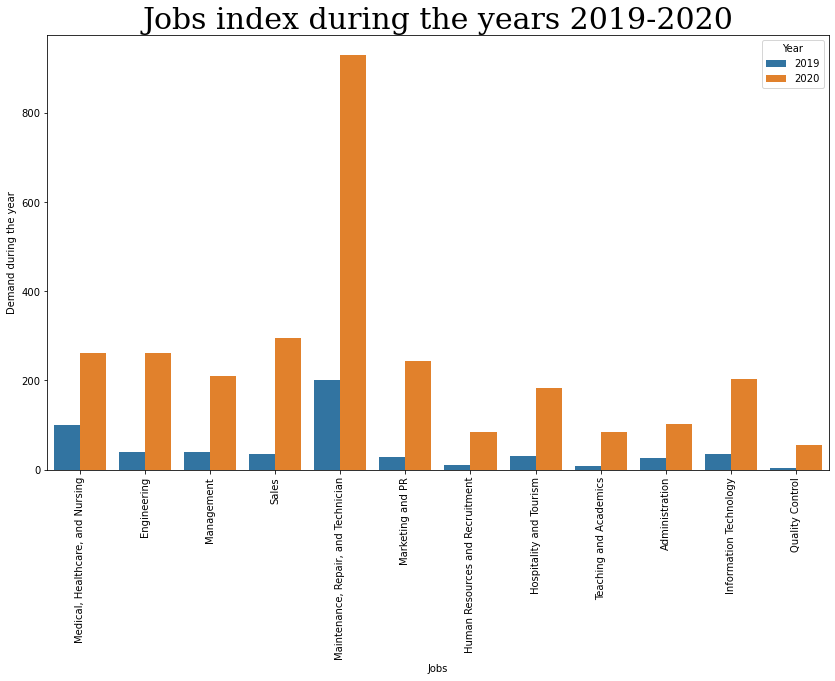

In [50]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as fig
import seaborn as sns
plt.figure(figsize=[14,8])
sns.countplot(x='Job_Role',hue='Year', data=DataSet)
plt.xticks(rotation=90)
plt.ylabel('Demand during the year')
plt.xlabel('Jobs')
plt.title('Jobs index during the years 2019-2020',family='serif',fontsize = 30);

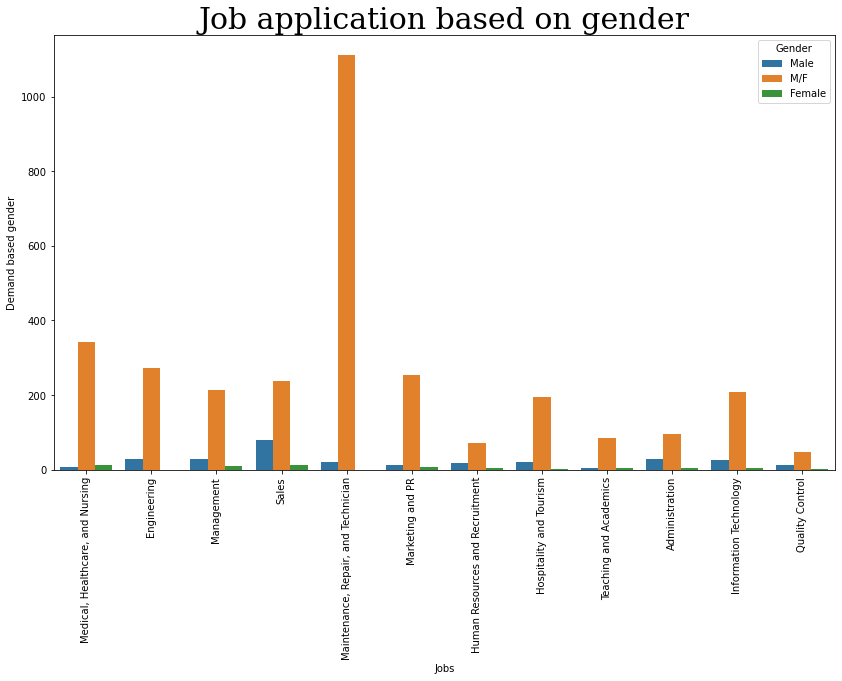

In [51]:
plt.figure(figsize=[14,8])
sns.countplot(x='Job_Role',hue='Gender',data=DataSet)
plt.xticks(rotation=90)
plt.ylabel('Demand based gender')
plt.xlabel('Jobs')
plt.title('Job application based on gender',family='serif',fontsize = 30);

In [52]:
# To can determine the cities on graph
DataSet.Job_City.unique()

array(['Riyadh', nan, 'Jeddah', 'Medina', 'Dammam', 'Mecca', 'Jubail',
       'Khobar', 'Alahsa', 'Jizan', 'AlKhafji', 'Alqunfithah', 'Abha',
       'Hafr Albaten', 'Aldawadmi', 'Buraidah', 'Hail', 'Alqasim',
       'Altaif', 'Najran', 'Yanbu', 'Khamis Mushait', 'Albaha',
       'Abu Areesh', 'Aseer', 'Onaizah', 'Eastern Province', 'Tabouk',
       'Arar', 'Ras Al Khair', 'Alkharj', 'Dahaban', 'Western Province',
       'Dhahran Al Janoub', 'Khulays', 'Al Majmaah', 'Rabigh',
       'Central Province'], dtype=object)

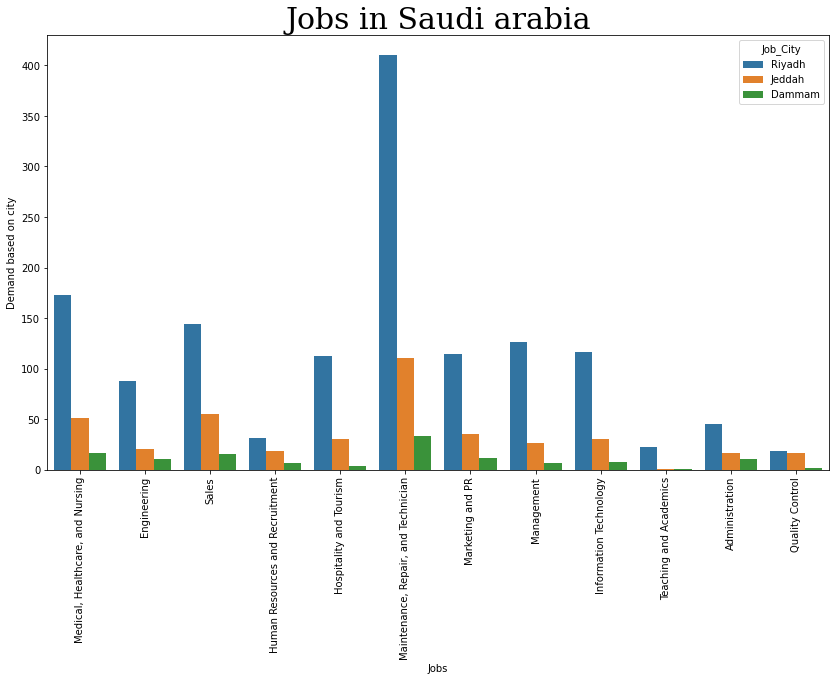

In [53]:
plt.figure(figsize=[14,8])
sns.countplot(x='Job_Role',hue='Job_City'
              , data=DataSet[DataSet.Job_City.isin(['Riyadh', 'Jeddah', 'Dammam'])])
plt.xticks(rotation=90)
plt.ylabel('Demand based on city')
plt.xlabel('Jobs')
plt.title('Jobs in Saudi arabia',family='serif',fontsize = 30) ;

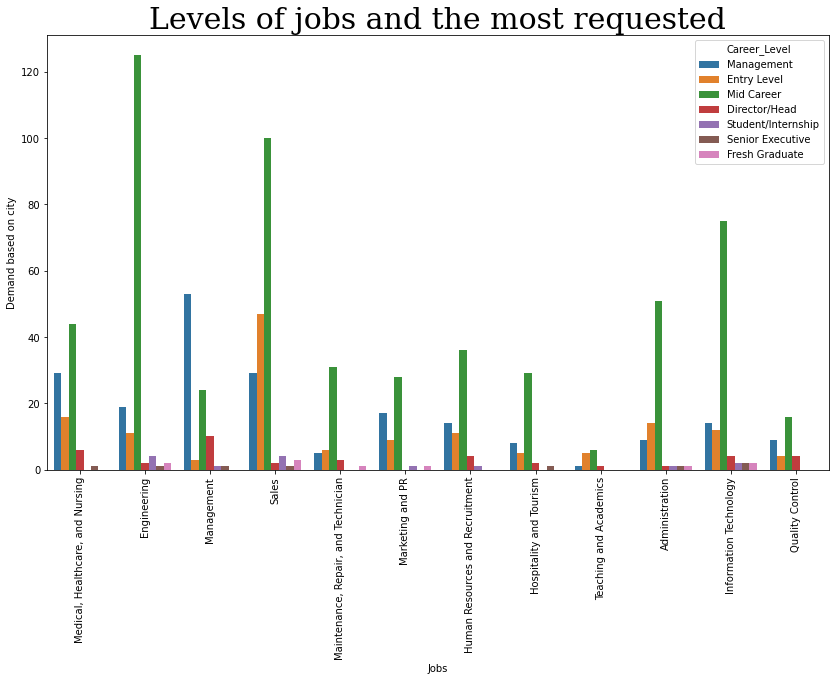

In [54]:
plt.figure(figsize=[14,8])
sns.countplot(x='Job_Role',hue='Career_Level', data=DataSet)
plt.xticks(rotation=90)
plt.ylabel('Demand based on city')
plt.xlabel('Jobs')
plt.title('Levels of jobs and the most requested',family='serif',fontsize = 30);

In [55]:
DataSet.Career_Level.unique()

array(['Management', nan, 'Entry Level', 'Mid Career', 'Director/Head',
       'Student/Internship', 'Senior Executive', 'Fresh Graduate'],
      dtype=object)

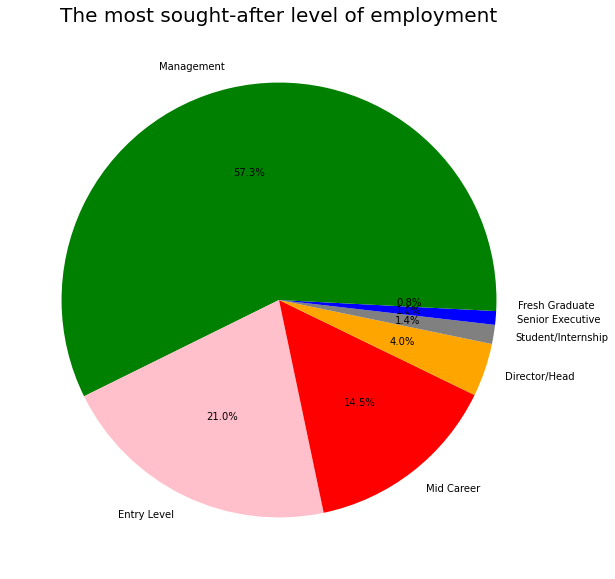

In [64]:
plt.figure(figsize=(15,10))
TF =['Management',  'Entry Level', 'Mid Career', 'Director/Head',
       'Student/Internship', 'Senior Executive', 'Fresh Graduate']
J = DataSet['Career_Level'].value_counts()
color = [ "green", 'pink', 'red', 'orange', 'grey', "blue",]
plt.pie(J, labels=TF, colors = color,  autopct='%1.1f%%' );
plt.title('The most sought-after level of employment', size=20);